In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, na_values='?')
    data.dropna(inplace=True)
    data['origin'] = data['origin'].astype(int)  # Convert 'origin' to integers for mutated_auto.93
    X = data.drop('origin', axis=1)
    y = data['origin']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test


In [7]:
# Function to train KNN classifier and make predictions
def train_knn(X_train, X_test, y_train, y_test, n_neighbors):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_test, y_pred

In [8]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(np.unique(y_true))  
    plt.yticks(np.unique(y_true))
    plt.show()

In [9]:
# Function to print classification report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [10]:
# Load and preprocess original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = load_and_preprocess_data('../data/auto93.csv')

# Load and preprocess mutated data
X_train_mutated, X_test_mutated, y_train_mutated, y_test_mutated = load_and_preprocess_data('../mutated_data/mutated_auto93.csv')

# Train KNN on original data
y_true_orig, y_pred_orig = train_knn(X_train_orig, X_test_orig, y_train_orig, y_test_orig, n_neighbors=3)

# Train KNN on mutated data
y_true_mutated, y_pred_mutated = train_knn(X_train_mutated, X_test_mutated, y_train_mutated, y_test_mutated, n_neighbors=3)

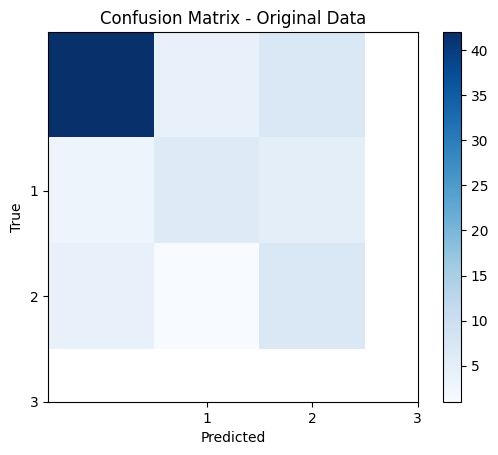

Classification Report - Original Data:
              precision    recall  f1-score   support

           1       0.86      0.79      0.82        53
           2       0.55      0.43      0.48        14
           3       0.37      0.58      0.45        12

    accuracy                           0.70        79
   macro avg       0.59      0.60      0.59        79
weighted avg       0.73      0.70      0.71        79



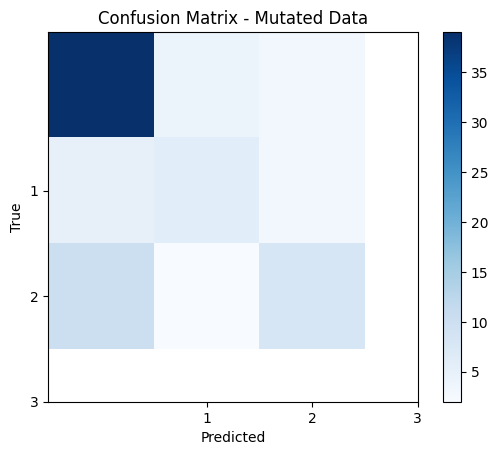

Classification Report - Mutated Data:
              precision    recall  f1-score   support

           1       0.72      0.85      0.78        46
           2       0.50      0.43      0.46        14
           3       0.57      0.40      0.47        20

    accuracy                           0.66        80
   macro avg       0.60      0.56      0.57        80
weighted avg       0.65      0.66      0.65        80



In [11]:
# Plot confusion matrix for original data
plot_confusion_matrix(y_true_orig, y_pred_orig, title='Confusion Matrix - Original Data')

# Print classification report for original data
print('Classification Report - Original Data:')
print_classification_report(y_true_orig, y_pred_orig)

# Plot confusion matrix for mutated data
plot_confusion_matrix(y_true_mutated, y_pred_mutated, title='Confusion Matrix - Mutated Data')

# Print classification report for mutated data
print('Classification Report - Mutated Data:')
print_classification_report(y_true_mutated, y_pred_mutated)

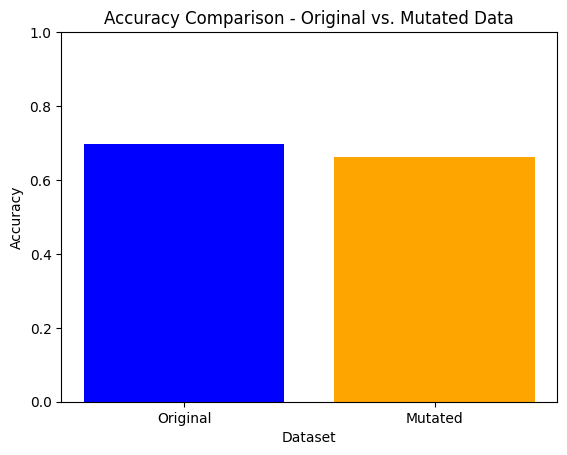

In [12]:
# Calculate accuracy for original and mutated datasets
accuracy_orig = calculate_accuracy(y_true_orig, y_pred_orig)
accuracy_mutated = calculate_accuracy(y_true_mutated, y_pred_mutated)

# Plot comparison graph
labels = ['Original', 'Mutated']
accuracies = [accuracy_orig, accuracy_mutated]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.title('Accuracy Comparison - Original vs. Mutated Data')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()